## Introducing pre-commit:

There's a nifty little python library called pre-commit that's doing rounds around the internet. And it all starts with a little file called .pre-commit-config.yaml. But we'll get into that later. First, let's talk about pre-commits in general.

As data scientists, we version our code, data and models. While versioning our code, we might use linters like flake8 and black to make sure our code conforms to the PEP guidelines. However, we usually have to run these manually and more often than not, we might forget to do so. Especially when we are in a hurry to meet a deadline, standards can be conveniently forgotten.

What if there were a way to automate these checks? What if we could ensure that we always conformed to a standard without the need to manually run commands? This is where pre-commit hooks come in.

A pre-commit hook will "hook" our code before it's committed to git. Whille "hooked", configured checks (linting / formatting / testing etc.) are run against the code. If any of these checks fail, the commit will fail too. This ensures that we always conform to the standards that we set for ourselves. These failures can be ignored if we don't want to be bothered.

In this post, we will discuss how to setup and configure pre-commit hooks for a Data Science project.

## Background

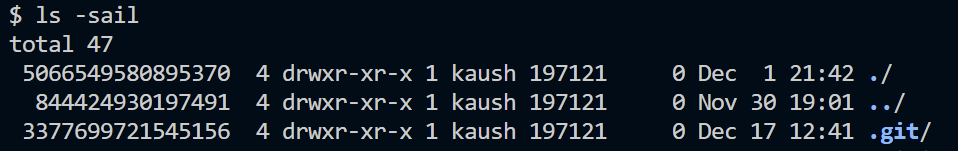

Whenever we setup a git repo, there's a special folder created within the repo directory, called the ".git" folder (see image above). The ".git" directory contains another folder called "hooks" where we can find some sample hooks written as shell scripts (see image below). We can edit these shell scripts if we like. But it's easier to use something more high level, something more point and shoot. That is where the python pre-commit library comes in.

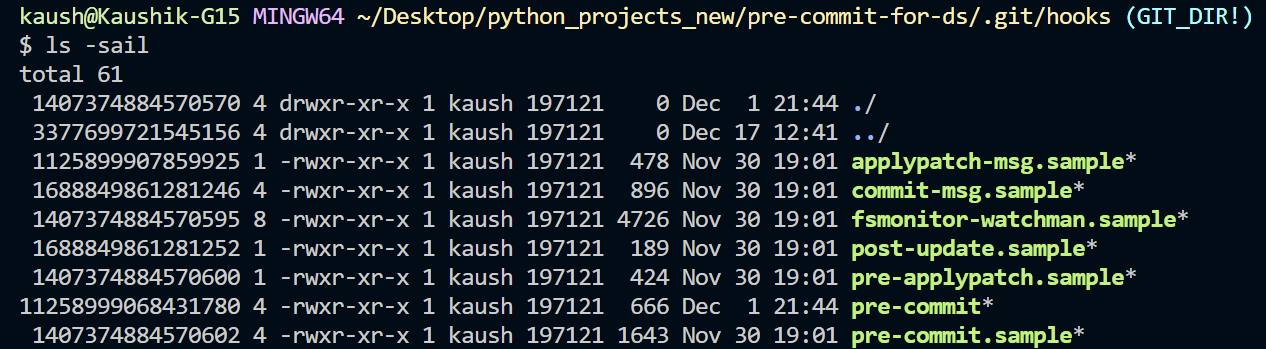

## Installation

Refer to the official [documentation](https://pre-commit.com/index.html). For the lazy, here's the TL;DR to run in your terminal:
```bash
pip install pre-commit
pre-commit
```

Now, you'll need to create a file called ".pre-commit-config.yaml" in the root folder of your git repo. This file will contain the configuration for the pre-commit hooks that you want to run. This file is the source of all the pre-commit magic. By the end of this blog post, we'll come up with a template for this file geared towards Data Science.

## Introducing: The pre-commit-config.yaml file

Let's start with the pre-commit-config.yaml file generated by the library itself. You can get this file by running the following command in your terminal:
```bash
pre-commit sample-config > .pre-commit-config.yaml
```

This will create a file with the following content:
```yaml
# See https://pre-commit.com for more information
# See https://pre-commit.com/hooks.html for more hooks
repos:
-   repo: https://github.com/pre-commit/pre-commit-hooks
    rev: v3.2.0
    hooks:
    -   id: trailing-whitespace
    -   id: end-of-file-fixer
    -   id: check-yaml
    -   id: check-added-large-files
```

Run the following command to install the hooks mentioned in your .pre-commit-config.yaml file:
```bash
pre-commit install
```

And that's it. You're all set to use the pre-commit hooks configured in your .pre-commit-config.yaml file. Even if you forget to do the install, the hooks mentioned in the config file will be installed when you try to commit, provided completed the pip install. 

Now, whenever you try to commit something, the pre-commit hooks configured in the file will run and if any of the hooks fail, the commit will fail too. So based on the current config file, we'll have checks for trailing whitepsaces, checks for large files being committed etc. run before every commit. 

We can add more hooks to this file to run more checks. Usually, there are different hooks for python scripts and jupyter notebooks. We can also setup the config file in such a way that we have hooks for both scripts and notebooks.

## .pre-commit-config.yaml explained

```yaml
repos:
-   repo: https://github.com/pre-commit/pre-commit-hooks
    rev: v3.2.0
    hooks:
    -   id: trailing-whitespace
    -   id: end-of-file-fixer
    -   id: check-yaml
    -   id: check-added-large-files
```

The .pre-commit-config.yaml file is quite easy to understand.  
- "repos:" - This lines indicates that a list of repos follow.  

- "-  repo:" - This is the first repo in a potential list of several repos that we wish to use as a pre-commit check. Don't forget to indent the line! This repo refers to the GitHub repo that contains the pre-commit hooks that we wish to use.  

- "rev:" - This line refers to the revision of the repo that we wish to use. This is the release version of the repo, found on the GitHub page of the repo on the right-hand side, below the "About" section.  

- "hooks:" - This line indicates that a list of hooks from that repo that pre-commit should use.

Here's a list of commands to run to setup pre-commit hooks:

1. Install the pre-commit library
```bash
pip install pre-commit
pre-commit
```

2. Create a .pre-commit-config.yaml file
```bash
pre-commit sample-config > .pre-commit-config.yaml
```

3. Add the hooks you want to run in the .pre-commit-config.yaml file
```
# edit the pre-commit-config.yaml file
```
4. [Optional] Install the hooks
```bash
pre-commit install
```

5. [Optional but recommended] Check old files.  
   You might want to run the command below if you ever add additional hooks to your .pre-commit-config.yaml file in the middle of your project, since pre-commit only runs the hooks on the files that have been changed. This is because pre-commit runs on the files which show in a git diff between your last commit and the commit you are about to make.
```bash
pre-commit run --all-files
```
And that's it! You're all set to use pre-commit hooks in your project. Just commit your code to see the hooks in action! The hooks will run every time you try to make a new commit.
```bash
git commit -m "commit message"
# committing to something was never this easy (^_−)
```

## .pre-commit-config.yaml for Data Science projects:

In Data Science projects, as far as it comes to code, we usually deal with python scripts (.py files) and jupyter notebooks (.ipynb files). So, we'll need to configure pre-commit hooks for these file types. The config file below is just what I came up with, so you'll need to adapt it to your purposes based on your needs.

```yaml
repos:
-   repo: https://github.com/pre-commit/pre-commit-hooks
    rev: v3.2.0
    hooks:
    -   id: trailing-whitespace
        args: ["--files", "^(?!.*\\.ipynb$|.*\\.ipynb:.+\\.md$)"]  
        # Excludes markdown cells within .ipynb files
    -   id: end-of-file-fixer
    -   id: check-yaml
-   repo: https://github.com/psf/black-pre-commit-mirror
    rev: 24.1.1
    hooks:
    -   id: black-jupyter
        name: black-jupyter
        description: "Black: The uncompromising Python code formatter (with Jupyter Notebook support)"
        entry: black
        language: python
        minimum_pre_commit_version: 2.9.2
        require_serial: true
        types_or: [python, pyi, jupyter]
        additional_dependencies: [".[jupyter]"]
-   repo: https://github.com/pycqa/flake8
    rev: 6.1.0  # pick a git hash / tag to point to
    hooks:
    -   id: flake8
        additional_dependencies: [
            'flake8-bugbear',
            'flake8-docstrings',
            'flake8-nb'
        ]
# reference : https://github.com/pre-commit/pre-commit-hooks/issues/311
-   repo: https://github.com/pycqa/isort
    rev: 5.12.0
    hooks:
    -   id: isort
-   repo: https://github.com/nbQA-dev/nbQA
    rev: 1.7.1
    hooks:
    -   id: nbqa-pyupgrade
        additional_dependencies: [pyupgrade==2.7.3]
    -   id: nbqa-isort
        additional_dependencies: [isort==5.6.4]
-   repo: https://github.com/pre-commit/mirrors-mypy
    rev: 'v1.7.1'  # Use the sha / tag you want to point at
    hooks:
    -   id: mypy
        args: [--strict, --ignore-missing-imports]
        additional_dependencies: [tokenize-rt==3.2.0]
-   repo: https://github.com/kynan/nbstripout
    rev: 0.6.1
    hooks:
    -   id: nbstripout
        name: nbstripout
        description: 'nbstripout: strip output from Jupyter and IPython notebooks'
        entry: nbstripout
        language: python
        types: [jupyter]
```

You can always look for more hooks for your own projects. Here's a [list of hooks](https://pre-commit.com/hooks.html), where you can start looking (search for "jupyter" or for "notebook" on the page).

### A small walkthrough:

Let's say we a jupyter notebook with the content below:

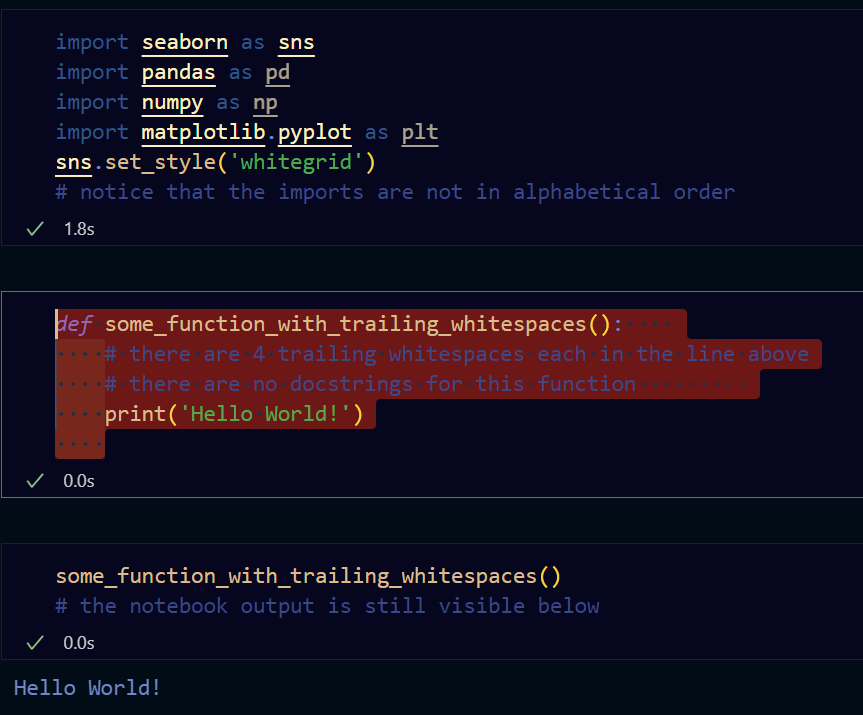

I also have a .py file with the same contents just to demonstrate the capability of pre-commit to handle both kinds of files at once. If we try to commit these files, the pre-commit hooks will run and the output will be as follows:

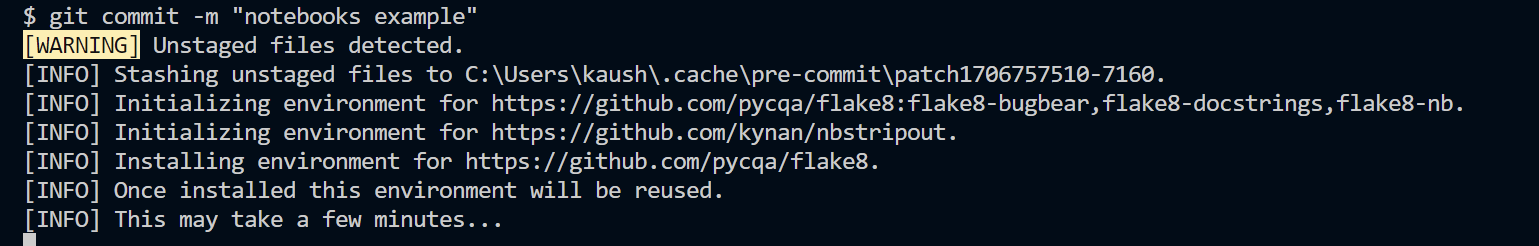

We see that some of the INFO lines are initializing environments for certain github URLs. These are the hooks mentioned in our config file that we didn't install. Pre-commit installs the hooks configured in the config file and runs the checks mentioned in the hooks. Some fixes will be made by pre-commit itself, such as removing trailing whitespaces, sorting imports alphabetically etc. Some of the edits, you'll have to make yourself, such as adding docstrings for functions. After my commit, my terminal might display the following:

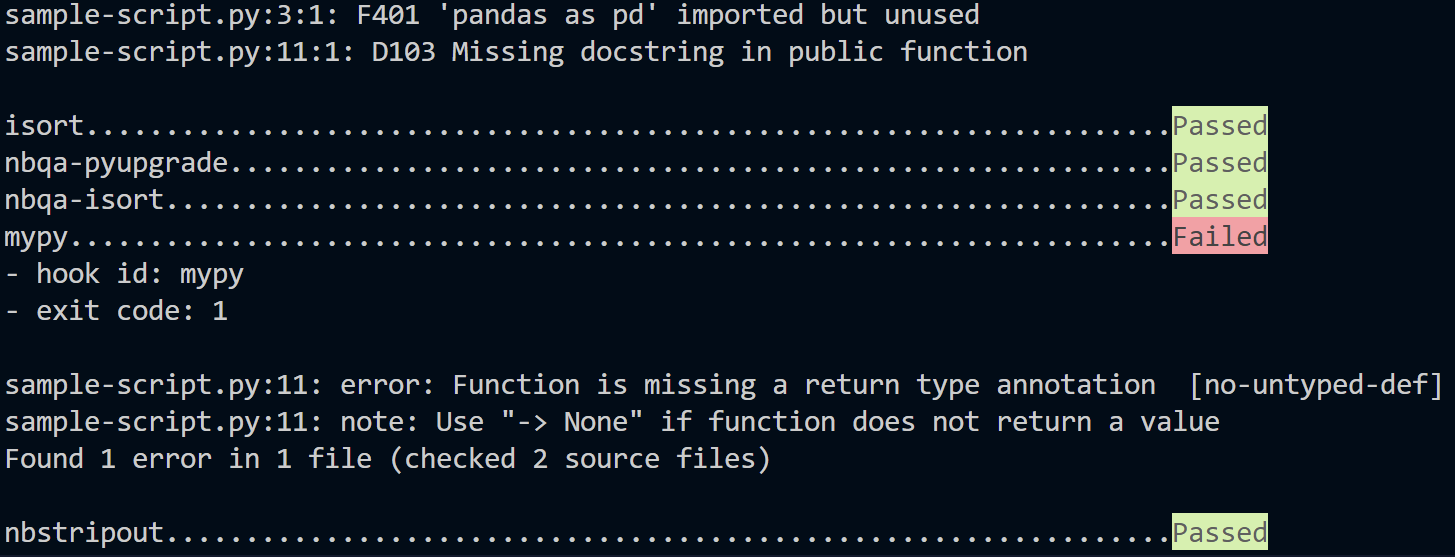

My notebook, with the fixes made by precommit now looks like this:

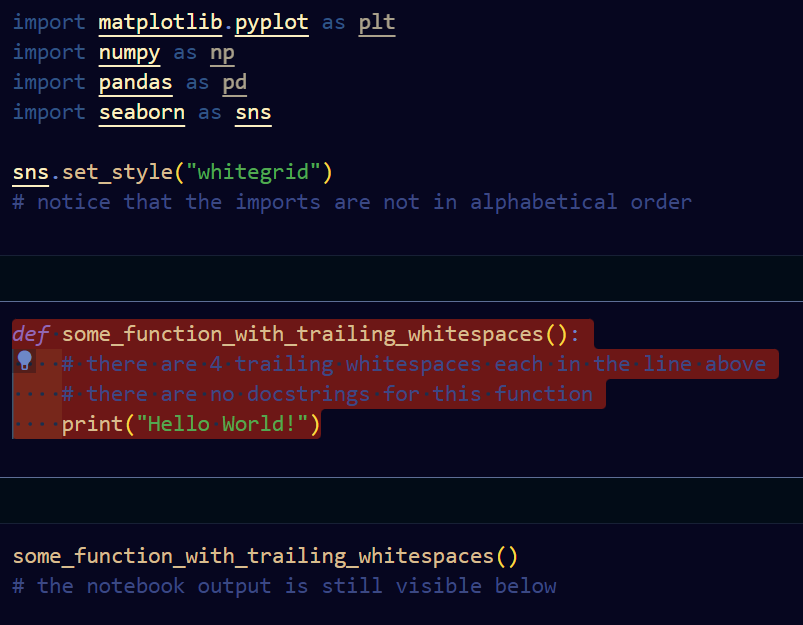

We see that pre-commit sorted the imports, removed the trailing whitespaces from the function definition and also removed the output displayed by the function call. The .py file will also have the same changes made to it. To make our commit suceed, we'll have to add a return type and a docstring to the function. After doing so, we can commit our code and the commit will succeed:

## Notes:

A small aside about "pre-commits". A pre-commit hook is a little script that runs before you commit your code. The structure of the name tells us a lot. One might wonder if post-commit hooks are a thing. They are. One might also wonder about the "commit" part of the name. What if the hooks are not restricted to just git commits? What if they could be run before other git commands (push / pull / checkout etc.) ? Armed with hooks, every git command might as well git hooked.

If your organization is up to date on its CI/CD game, you might already have a .pre-commit-config.yaml file in your repo. If you do, now you know what goes on under the hood. If you're wondering whether this makes pre-commit a part of your MLOps pipeline, you're on the right track. It most definitely does.

Usually linters and format checkers are run at the end of a project or before a release. There might be hundreds or even thousands of commits and files at that point. Pre-commit helps us avoid such a scenario.

nbstripout to maintain privacy of data when you commit your notebooks.

Check our pre-commit bookmarks folder for a list of references. Make a references file maybe.